# Лабораторная работа №3. Регрессионный анализ 2024

## Цель работы

Изучение алгоритмов и методов регрессии на практике.

Вариант №1

## Выполнение работы

### Часть 1 - Простая линейная регрессия

Задача - обучить модель простой (парной) линейной регрессии, в которой для обучения используются значения х1 и y.

Создается датафрейм, где будут располагаться изучаемые данные.

In [ ]:
import pandas as pd

x1 = [3,3,6,6,7,8,9]
x2 = [9,8,9,7,4,5,3]
y = [38.1, 38.6, 40.9, 38.6, 41.3, 43.1, 44.3]

df1 = pd.DataFrame(data={'x1': x1, 'x2': x2, 'y': y})
display(df1)

,x1,x2,y
0,3,9,38.10
1,3,8,38.60
2,6,9,40.90
3,6,7,38.60
4,7,4,41.30
5,8,5,43.10
6,9,3,44.30


Далее полученный датасет делится на тренировочный и валидационный наборы с помощью функции `train_test_split()`.
1. `test_size`, `train_size` - необязательные параметры, отвечающие за количество данных в % который пойдут в выборку, в данном примере датасет был поделен в соотношении 3 к 1, как правило в такой пропорции и разбивают. То есть 1 часть ушла на валидационный, а 3 части - на тренировочный.
2. `random_state` - отвечает за перемешивание данных, туда педается какое-либо целочисленное значение, при каждом запуске выборка мешается одинаково.
Также инициализируется модель `LinearRegression`, далее применяются параметры:
3. `fit` - функция, отвечающая за обучение модели
4. `predict` - служит уже для предсказания модели на валидационной выборке
В переменной `prediction` хранятся все предсказанный значения для x_valid

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x1 = df1['x1']
y = df1['y']

X_train, X_test, y_train, y_test = train_test_split(x1,
                                                   y,
                                                   test_size=0.25,
                                                   random_state=0)

model = LinearRegression()
model.fit(np.array(X_train).reshape(-1,1), y_train)
prediction = model.predict(np.array(X_test).reshape(-1,1))

В переменной `prediction` хранятся все предсказанные значения для X_test. Можно сравнить предсказания с исходными, создав датафрейм из исходных известных значений ( y_test ) и предсказанных моделью `prediction` . Кроме того, важно оценить качество алгоритма с помощью метрик MSE (средняя квадратичная ошибка), MAE (средняя абсолютная ошибка), RMSE (среднеквадратичная ошибка) и R2 (коэффициент детерминации).

- MSE (Средняя квадратичная ошибка) – среднее значение квадратов ошибок, MSE позволяет оценить, насколько сильно модель отклоняется от истинных значений целевой переменной. Чем меньше значение MSE, тем более точно модель предсказывает значения.


- MAE (Средняя абсолютная ошибка) - Средняя абсолютная ошибка между фактическими и прогнозируемыми значениями.
Если MAE равна 0, это указывает на идеальное соответствие прогнозов реальным значениям.
Чем выше значение MAE, тем больше ошибок в прогнозах модели.

- RMSE (среднеквадратичная ошибка) -  квадратный корень из среднего квадрата ошибок (MSE), в отличие от MSE, масштаб ошибки аналогичен исходным данным, что облегчает интерпретацию.

- R2 (Коэффициент детерминации) -  метрика, которую нужно максимизировать, определяет долю
изменений, обусловленных влиянием признаков на целевую переменную.  Метрика коэффициент детерминации нормализована, то есть не превышает единицу -
удобно сравнивать разные модели

In [ ]:
from sklearn import metrics

df_match = pd.DataFrame({'Actual': y_test, 'Predicted': prediction })

display(df_match)

print('Оценка качества алгоритмов:')
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R2:', metrics.r2_score(y_test, prediction))

,Actual,Predicted
6,44.30,42.86
2,40.90,40.43


Оценка качества алгоритмов:
MSE: 1.1425262548949915
MAE: 0.9542452830188743
RMSE: 1.068890197772901
R2: 0.6046621955380649


Выводы по метрикам:

1. Значение MSE равное 1.14 указывает на среднюю квадратичную разницу между предсказанными и реальными значениями. Это значение свидетельствует о наличии ошибок в предсказаниях, но они остаются умеренными.
2. Значение MAE примерное 0.95 показывает, что предсказания модели в среднем отклоняются от реальных значений на 0.95 единиц. Это относительно небольшая ошибка, что указывает на хорошую точность.
3. Значение RMSE приблизетельно равное 1.07 показывает стандартное отклонение ошибок предсказаний. Значение чуть выше, чем MAE, что указывает на наличие небольших отклонений, которые, однако, незначительно влияют на общую ошибку.
4. Значение R2 равно 0.60, что означает, что модель объясняет около 60% изменчивости фактических значений. Это умеренный показатель, который говорит о том, что модель захватывает часть изменчивости данных, но значительное улучшение еще возможно.

Основываясь на показателях, можно сделать вывод, что модель плохо обучена, что обусловлено малым размером исследуемого датасета.

Строится линия регрессии, для чего сначала находятся коэффициенты a и b для графика прямой (y = ax + b) с помощью coef_ и intercept_.

Затем строится распределение точек исходного датасета df и линия регрессии.

a = 0.8122641509433959 
b = 35.553773584905656 
уравнение прямой: y = 0.81x + 35.55



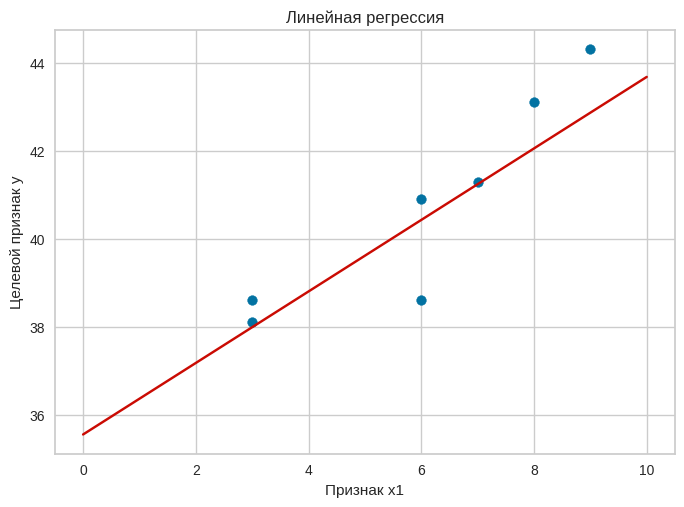

In [ ]:
import matplotlib.pyplot as plt

a = model.coef_
b = model.intercept_
print(f"a = {a[0]} \nb = {b} \nуравнение прямой: y = {round(a[0], 2)}x + {round(b, 2)}\n")

plt.scatter(x1, y)
plt.plot([0, 10], [a*0 + b, a*10 + b], "r")
plt.grid("g")
plt.title('Линейная регрессия')
plt.xlabel('Признак x1')
plt.ylabel('Целевой признак y')
plt.show()

График показывает, что существует линейная связь между переменными: чем больше значения x1, тем больше значения y.

Далее строится график с разницей предсказанного и истинного значения (график остатков) по каждой точке, который позволит увидеть разницу между знчениями.

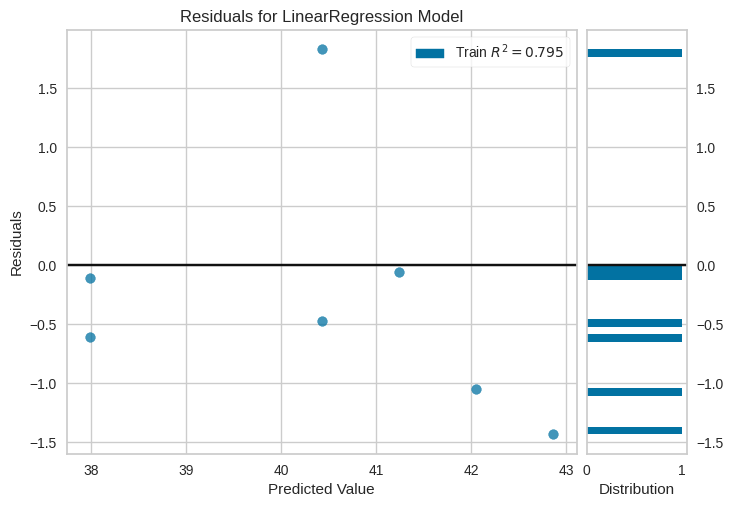

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(np.array(x1).reshape(-1,1), y)
visualizer.show()

Значения разности между предсказанными и истинными значениями в основном распределены ниже нуля, что говорит о том, что модель в основном недооценивает значения. Остатки имеют относительно равномерное распределение вокруг нулевой линии, что говорит об отсутствии значительных систематических ошибок. Однако есть несколько точек, где остатки превышают 1.5 или опускаются ниже -1.5, что может указывать на выбросы или недостаточно точные предсказания для некоторых данных.

Строится диаграмма, на которой присутствует прямая, показывающая изначальные значения и изображаются точки, которые показывают предсказанные значения. Чем точка была ближе к красной прямой, тем более точно была предсказана точка к ее истинному значению.

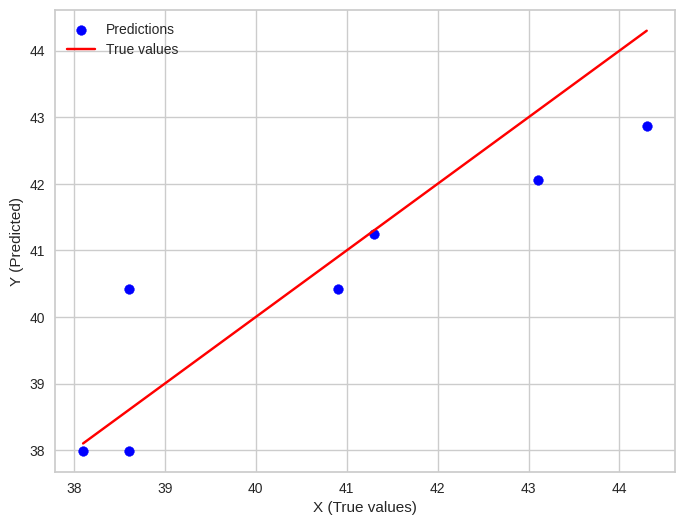

In [ ]:
prediction = model.predict(np.array(x1).reshape(-1,1))
plt.figure(figsize=(8, 6))
plt.scatter(y, prediction, color='blue', label='Predictions')

plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='True values')

plt.xlabel('X (True values)')
plt.ylabel('Y (Predicted)')
plt.legend(loc='upper left')

plt.show()

График показывает, что модель хорошо предсказывает значения. Точки, представляющие прогнозы, очень близки к прямой линии (некоторые находятся прям на прямой), представляющей истинные значения, но есть и более отдаленные точки. Прогнозы в целом согласуются с реальными данными.

### Часть 2 - Полиномиальная регрессия

Прежде всего создается датафрейм с исходными данными

In [ ]:
x = [0, 1, 2, 3, 4, 5, 6]
y = [19.4, 28.8, 48.2, 58.0, 80.3, 88.7, 96.1]

df2 = pd.DataFrame(data={'x': x, 'y': y})
display(df2)

,x,y
0,0,19.40
1,1,28.80
2,2,48.20
3,3,58.00
4,4,80.30
5,5,88.70
6,6,96.10


Далее реализуется анализ полиномиальной регрессии для определения оптимальной степени полинома, которая лучше всего описывает зависимости в данных. Для каждой степени полинома с помощью PolynomialFeatures создаются новые признаки, позволяющие модели учитывать нелинейные зависимости. Затем модель линейной регрессии обучается на преобразованных данных, выполняются предсказания, и подсчитываются метрики качества, такие как MAE и R2. Результаты визуализируются в виде графиков, где отображаются исходные данные, предсказанная полиномиальная зависимость и значения метрик. Данные графики строятся для 6 значений степени полинома.

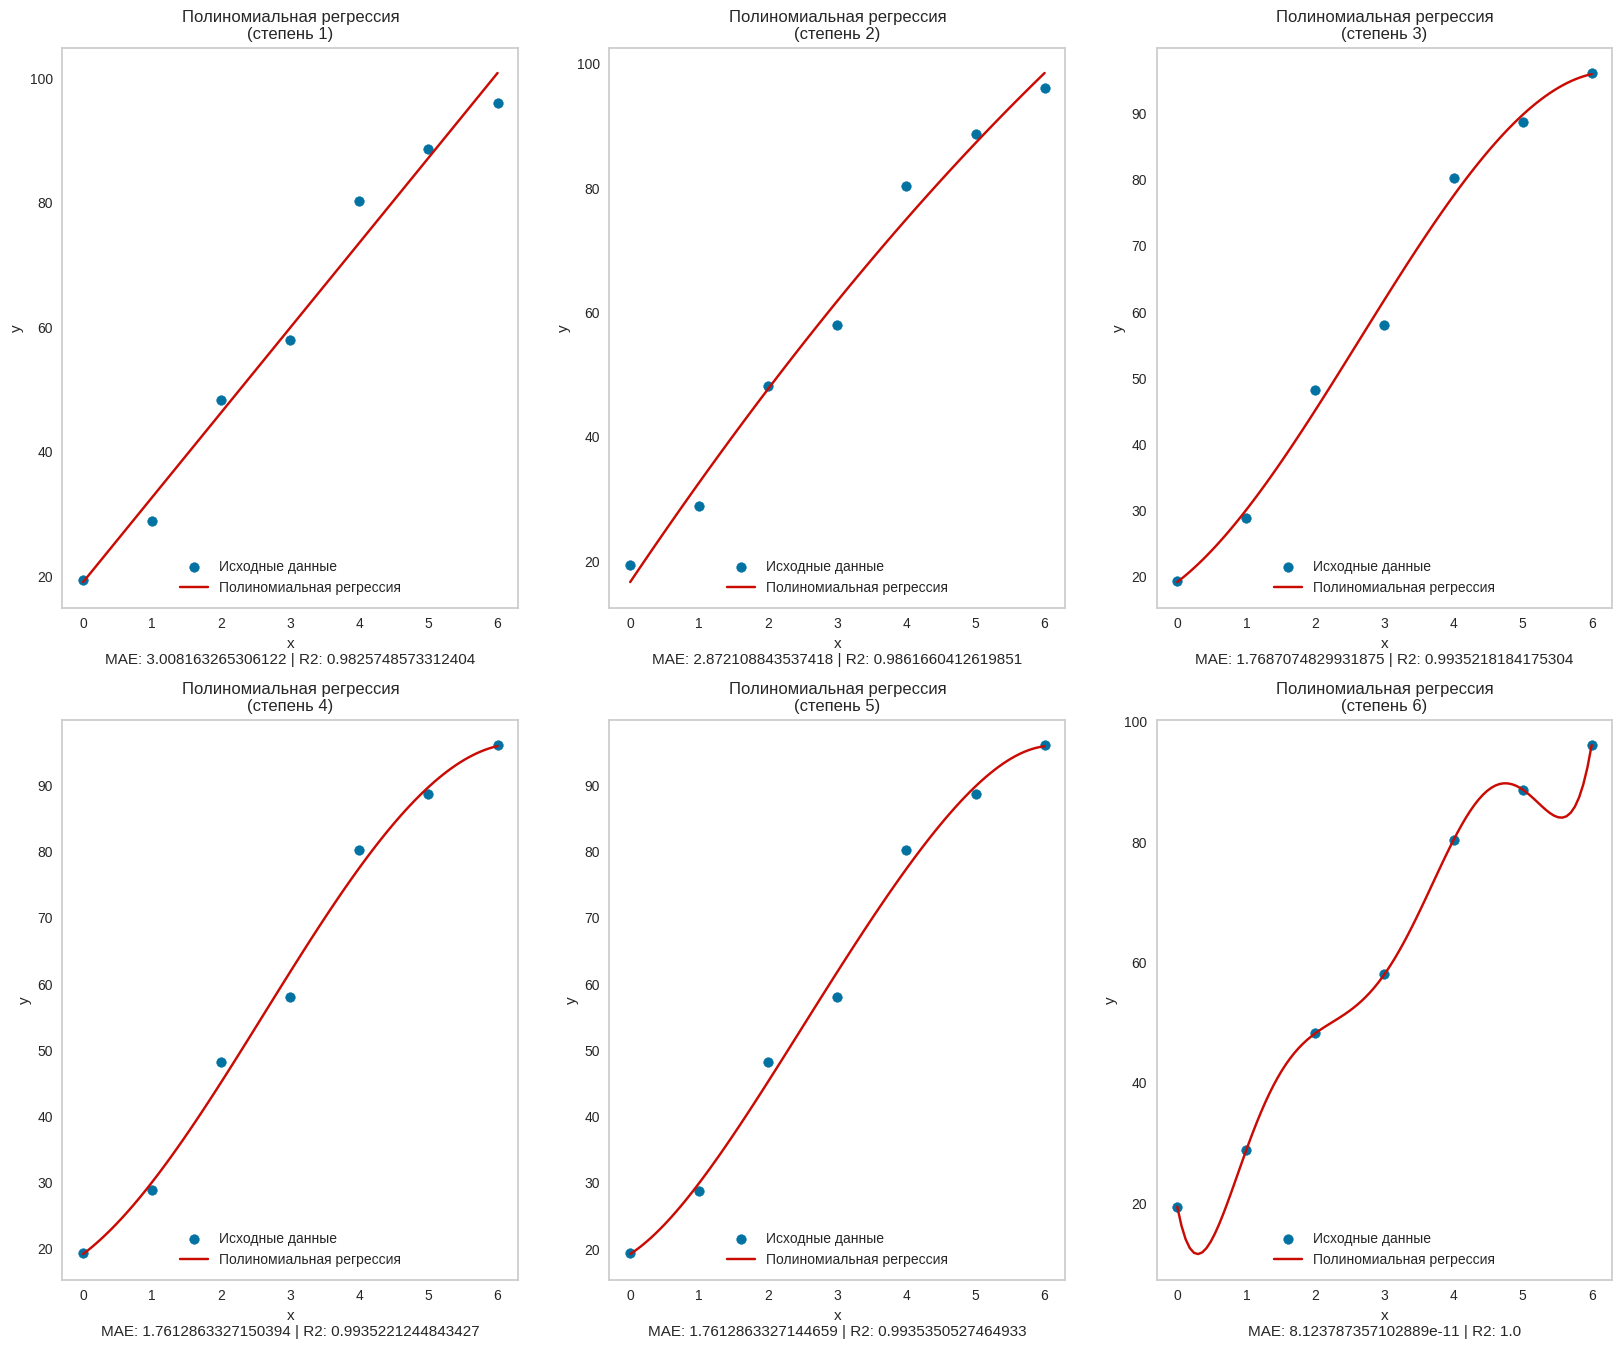

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

X_poly = np.array(df2['x']).reshape(-1, 1)
y_poly = np.array(df2['y'])

def plt_poly(x, y, degree):

    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(x)
    line_reg = LinearRegression()
    line_reg.fit(X_poly, y)
    y_pred = line_reg.predict(X_poly)

    x_range = np.linspace(min(x), max(x), 100).reshape(-1, 1)
    X_range_poly = poly_features.transform(x_range)
    y_range = line_reg.predict(X_range_poly)

    mae = metrics.mean_absolute_error(y, y_pred)
    r2 = metrics.r2_score(y, y_pred)

    plt.subplot(2, 3, degree)
    plt.scatter(x, y, label='Исходные данные')
    plt.plot(x_range, y_range, 'r', label='Полиномиальная регрессия')
    plt.title(f'Полиномиальная регрессия\n(степень {degree})')
    plt.ylabel('y')
    plt.xlabel('x\n'f'MAE: {mae} | R2: {r2}')
    plt.legend(loc='lower center')
    plt.grid()

plt.figure(figsize=(20, 16))

for degree in range(1, 7):
    plt_poly(X_poly, y_poly, degree)

plt.show()

С увеличением степени полинома заметно, что метрика MAE уменьшается, коэффициент детерминации R2 возрастает, стремясь к 1. Изменение этих метрик, показывает что модель становится точнее и предсказания становятся все ближе к исходным значениям. Но чем выше степень полинома, тем труднее заметить изменения в метриках, что может означать об излишнем обучении модели, она становится излише сложной и может плохо справляться со сложными данными. Так при полиноме 6 степени коэффициент R2 = 1, это означает идеальное совпадение с изначальными данными. Начиная с полинома третьей степени, прирост R² становится менее значительным, а MAE перестает существенно уменьшаться. Это может свидетельствовать о том, что модель уже достаточно хорошо подстроена под данные, и дальнейшее увеличение степени полинома не принесет существенного улучшения.

Исходя из анализа, можно сделать вывод, что полином третьей степени является оптимальным (при метриках MAE: 1.77, R2: 0.9935). Он хорошо описывает нелинейность данных, минимизирует ошибку и избегает переобучения.

### Часть 3 - Решение задачи регрессии различными методами

С помощью библиотеки pandas считывается файл car_price.csv и выводится информация о нем.

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/carprice.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Описание столбцов загруженного датасета:
1. Car_ID - Уникальный идентификатор каждого наблюдения (целое число)
2. Symboling - Присвоенный рейтинг страхового риска:
- +3 - автомобиль является рискованным,
- -3 - довольно безопасен. (категориальный)
3. carCompany - Название автомобильной компании
5. fueltype - Тип топлива
6. aspiration - Аспирация, используемая в автомобиле
7. doornumber - Количество дверей в автомобиле
8. carbody - Кузов автомобиля
9. drivewheel - Тип ведущего колеса
10. enginelocation - Расположение двигателя автомобиля
11. wheelbase - Колесная база автомобиля
12. carlength - Длина машины
13. carwidth - Ширина машины
14. carheight - Высота машины
15. curbweight - Вес автомобиля без пассажиров и багажа
16. enginetype - Тип двигателя
17. cylindernumber - Баллон, помещенный в автомобиль
18. enginesize - Размер машины
19. fuelsystem - Топливная система автомобиля
20. boreratio - Коэффициент расточки вагона
21. stroke - Stroke or volume inside the engine (Numeric)
22. compressionratio - Рабочий ход или объем внутри двигателя
23. horsepower - Мощность в лошадиных силах
24. peakrpm - Пиковые обороты автомобиля
25. citympg - Пробег по городу
26. highwaympg - Пробег по шоссе
27. price - Цена авто

Проводится предварительный анализ данных на наличие явных и неявных дубликатов.

In [ ]:
print(df3.duplicated().sum())

0


In [ ]:
text_columns = df3.select_dtypes(include=['object']).columns
for _ in text_columns:
  display(df3[_].unique())

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

array(['gas', 'diesel'], dtype=object)

array(['std', 'turbo'], dtype=object)

array(['two', 'four'], dtype=object)

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

array(['rwd', 'fwd', '4wd'], dtype=object)

array(['front', 'rear'], dtype=object)

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

Никаких дубликатов обнаружено не было, поэтому следует преступить к следующему шагу.

Необходимо выбрать целевую переменную которую в дальнейшем придется предсказать, в данном случае была выбрана переменная `price`, так как цена является одним из ключевых параметров при выборе и покупке автомобиля.

Для выбранной целевой переменной строится гистограмма и boxplot.

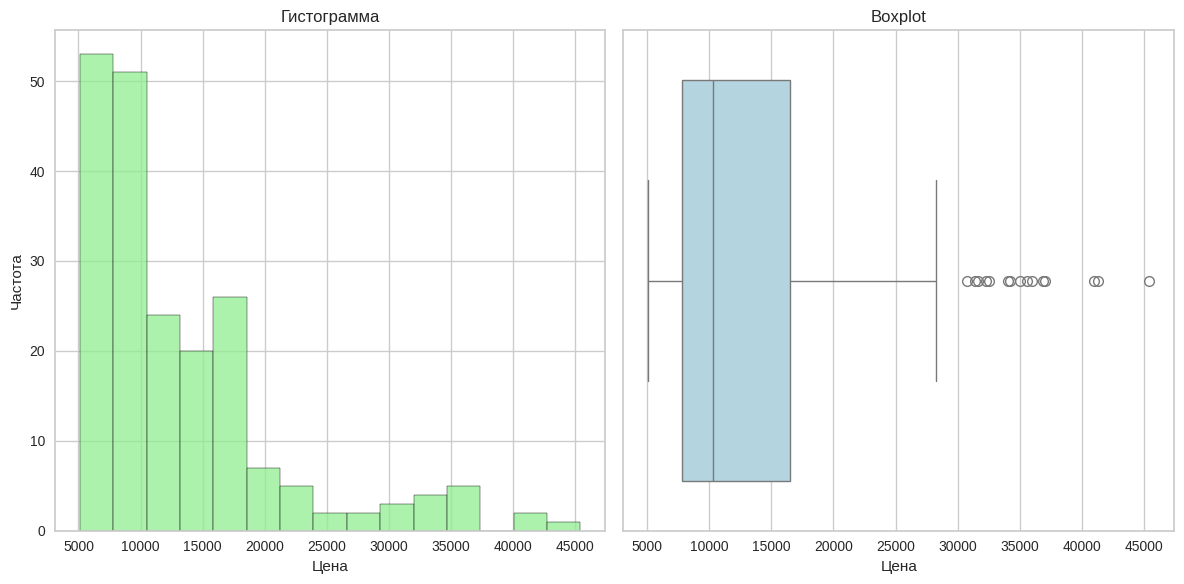

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df3['price'], bins=15, color='lightgreen')
plt.title('Гистограмма')
plt.xlabel('Цена')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(x=df3['price'], color='lightblue')
plt.title('Boxplot')
plt.xlabel('Цена')

plt.tight_layout()
plt.show()


Гистограмма показывает, что распределение цен на автомобили имеет асимметричный вид, смещённый влево. Основная часть значений сосредоточена в диапазоне от 5000 до 15000, а максимальная частота наблюдений приходится на диапазон около 5000–10000. В области цен выше 20000 количество наблюдений резко сокращается, что свидетельствует о наличии меньшего числа дорогих автомобилей.

Диаграмма размаха (boxplot) позволяет увидеть, что медиана находится ближе к нижнему краю ящика, что подтверждает левостороннюю асимметрию данных. Прямоугольник (межквартильный размах, IQR) охватывает большинство данных в диапазоне примерно от 8000 до 20000. За пределами "усов" видны выбросы, которые находятся в диапазоне свыше 25000. Самые высокие значения достигают 45000.

Далее строится матрица диаграмм рассеяния для анализа взаимосвязи числовых параметров, но для начала пробег по городу и автомагистрали складывается в один столбец, а длина, ширина и высота авто отображается через столбец `dimensions` (габариты).

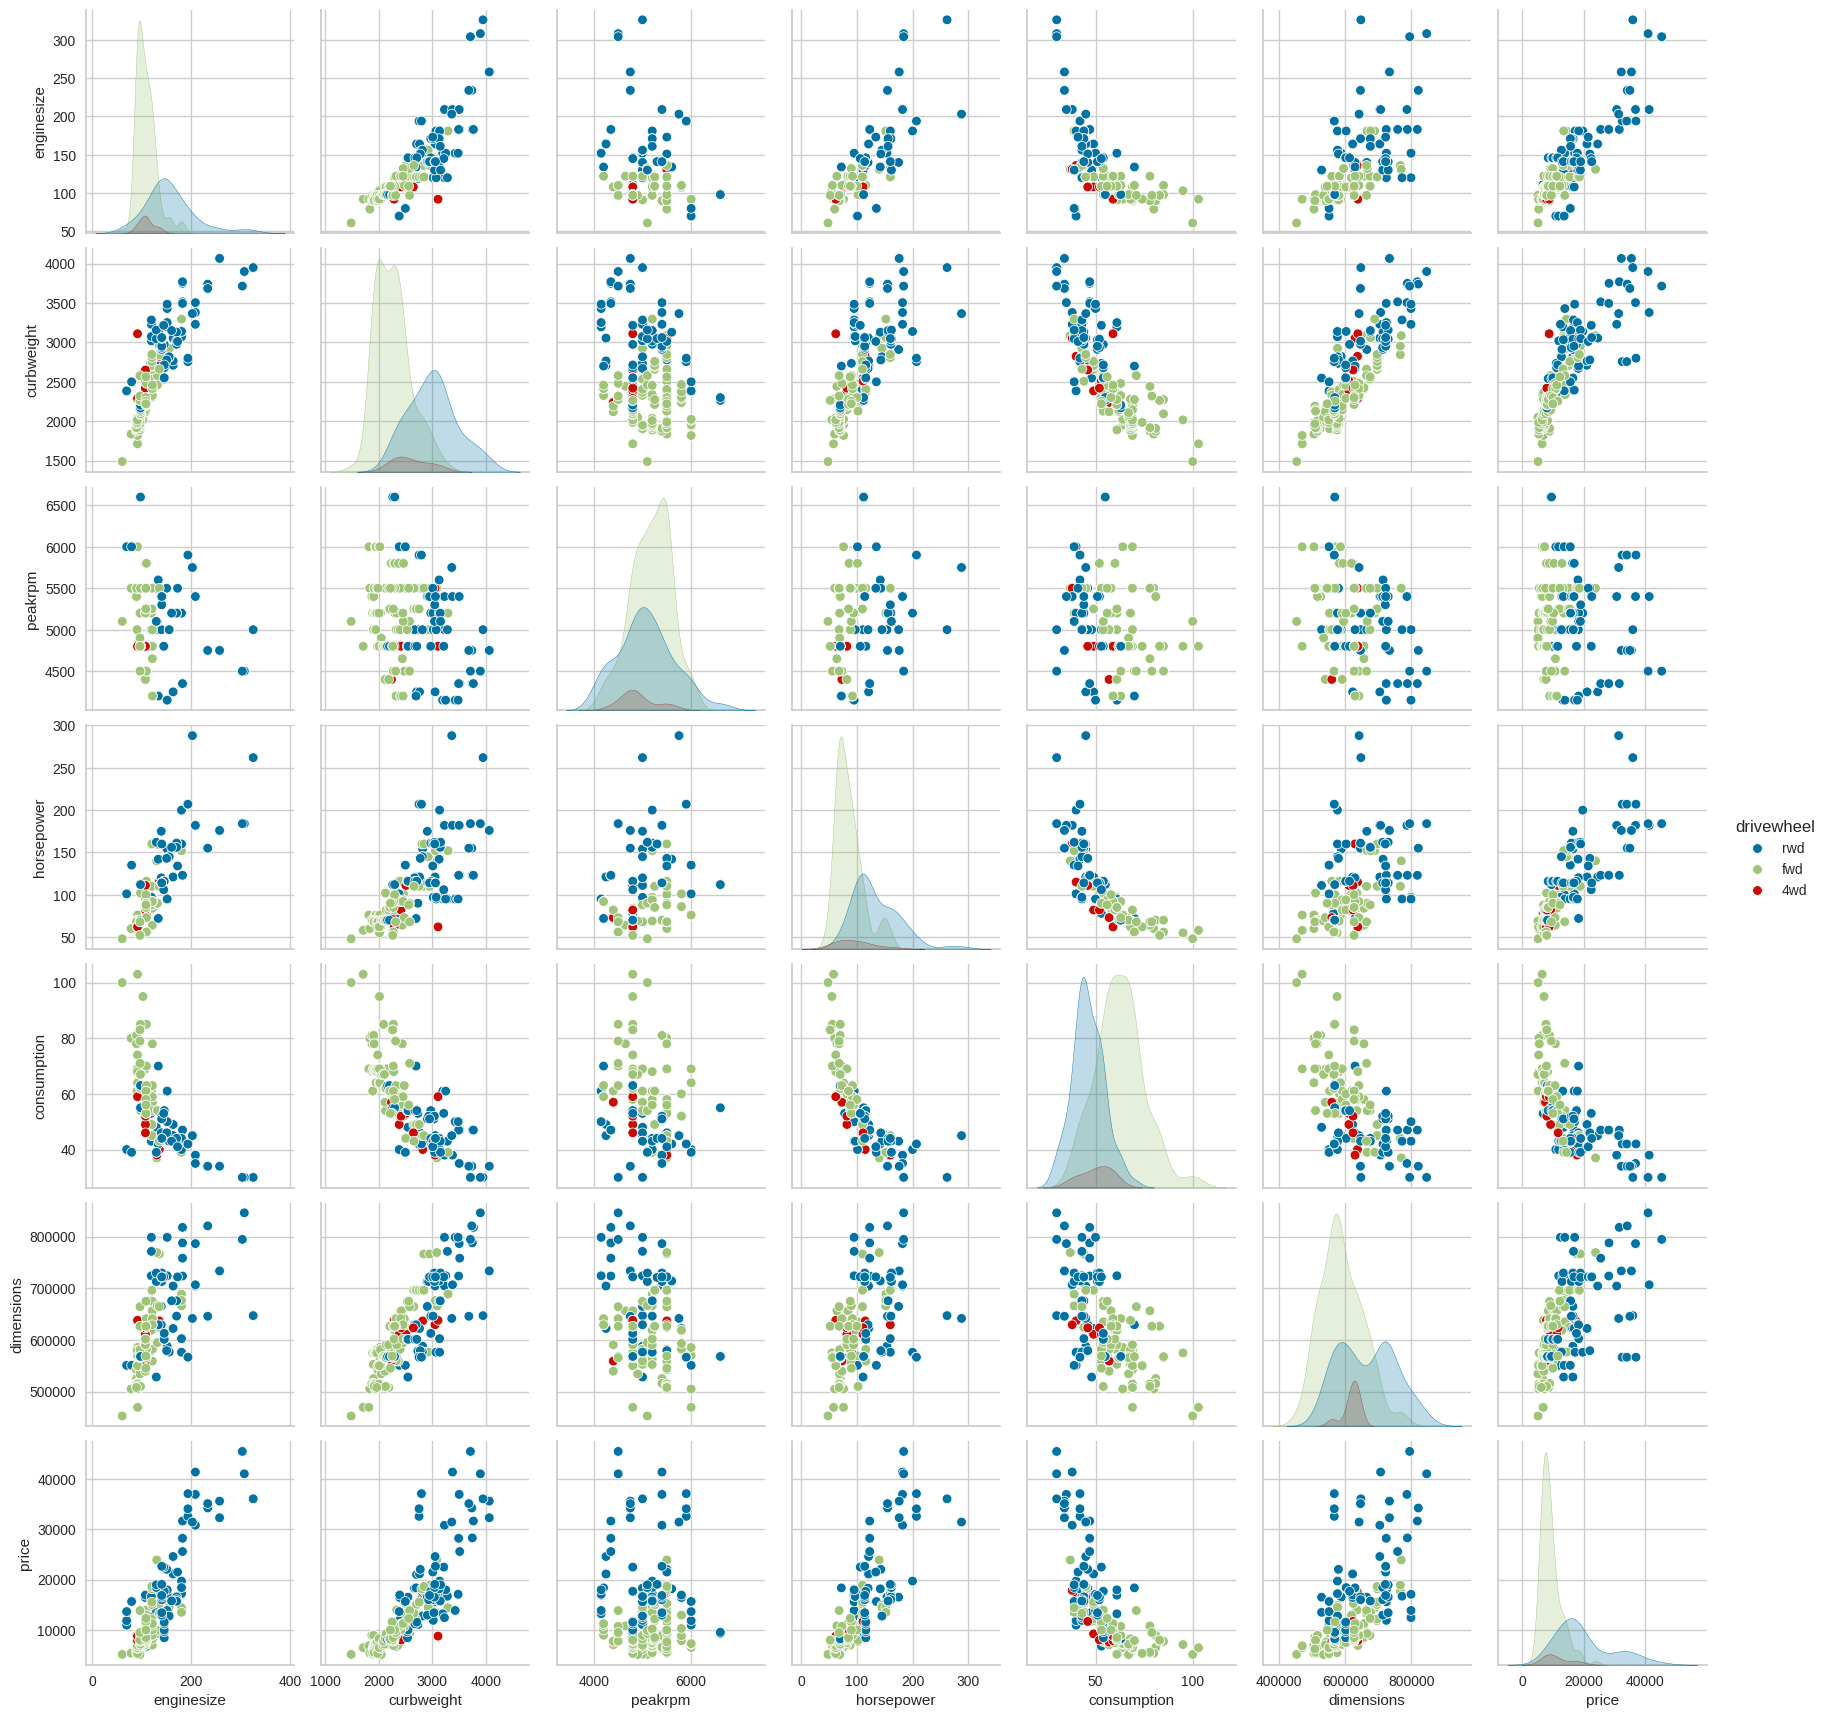

In [ ]:
df3['consumption'] = df3['citympg'] + df3['highwaympg']
df3['dimensions'] = df3['carlength'] * df3['carwidth'] * df3['carheight']
sns.pairplot(df3[['enginesize', 'curbweight', 'peakrpm',
                   'horsepower', 'consumption', 'dimensions', 'price', 'drivewheel']], hue='drivewheel')

Матрица диаграмм рассеивания показала, что в датафрейме представлен широкий список автомобилей разной цены. Разберем диаграммы связанные с price.
- enginesize и price: видна сильная положительная корреляция. По мере увеличения размера двигателя цена автомобиля также растёт. Это логично, так как большие двигатели обычно встречаются в более дорогих и мощных автомобилях. Автомобили с передним приводом (fwd) в основном занимают диапазон более низких цен.
- curbweight и price: наблюдается положительная зависимость, более тяжёлые автомобили имеют тенденцию быть более дорогими. Тип привода также оказывает влияние: автомобили с задним приводом (rwd) расположены в более высоком ценовом сегменте.
- peakrpm и price: точки на графике распределены хаотично, без выраженной линейной или нелинейной зависимости. Значения price остаются достаточно разбросанными для всех диапазонов peakrpm. Это говорит о том, что данный параметр не влияет на цену автомобиля.
- horsepower и price: наблюдается положительная зависимость, автомобили с большей мощностью, как правило, имеют более высокую цену. Однако наблюдаются выбросы — некоторые автомобили с высокой мощностью находятся в относительно среднем ценовом диапазоне, что может быть связано с модельными особенностями.
- consumption и price: здесь присутствует обратная зависимость: по мере увеличения расхода топлива (или уменьшения значения расхода) цена автомобилей, как правило, растёт. Это характерно для мощных автомобилей, которые потребляют больше топлива.
- dimensions И price: наблюдается положительная зависимость, видно как цена линейно возрастает пропорцианально росту габаритов автомобиля. Высокая цена характерна для больших автомобилей, так как на них как минимум уходит больше ресурсов на производстве.

Тип привода (drivenwheel) также влияет на распределение точек. Задний привод чаще ассоциируется с более дорогими автомобилями. Полный привод встречается реже всего и находится в средней ценовой категории. Самые распространенные, но и самые дешевые автомобили на переднем приводе.

Также есть много других зависимостей, которые четко видны на графиках. В некоторых переменных, видны выбросы.

Для последующего обучения модели необходимо преобразовать датафрейм. Для этого нужно заменить категориальные значения на числовые по типу: для каждого уникального текстового значения присваивалось уникальное числовое значение.
С помощью функции `label_encoder.fit_transform()` датафрейм преобразовывается.

In [ ]:
from sklearn.preprocessing import LabelEncoder

txt_columns = df3.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for i in txt_columns:
  df3[i] = label_encoder.fit_transform(df3[i])
df3

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,consumption,dimensions
0,1,3,2,1,0,1,0,2,0,88.60,...,3.47,2.68,9.00,111,5000,21,27,13495.00,48,528019.90
1,2,3,3,1,0,1,0,2,0,88.60,...,3.47,2.68,9.00,111,5000,21,27,16500.00,48,528019.90
2,3,1,1,1,0,1,2,2,0,94.50,...,2.68,3.47,9.00,154,5000,19,26,16500.00,45,587592.64
3,4,2,4,1,0,0,3,1,0,99.80,...,3.19,3.40,10.00,102,5500,24,30,13950.00,54,634816.96
4,5,2,5,1,0,0,3,0,0,99.40,...,3.19,3.40,8.00,115,5500,18,22,17450.00,40,636734.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.10,...,3.78,3.15,9.50,114,5400,23,28,16845.00,51,721961.76
201,202,-1,138,1,1,0,3,2,0,109.10,...,3.78,3.15,8.70,160,5300,19,25,19045.00,44,720913.92
202,203,-1,140,1,0,0,3,2,0,109.10,...,3.58,2.87,8.80,134,5500,18,23,21485.00,41,721961.76
203,204,-1,142,0,1,0,3,2,0,109.10,...,3.01,3.40,23.00,106,4800,26,27,22470.00,53,721961.76


Данные последовательно разделяются и обрабатываются для построения и оценки модели линейной регрессии. Для начала данные разделяются на обучающую и временную выборку, далее временная выборка разделяется на валидационную и тестовую выборку, после чего данные нормализируются.

Далее происходит обучение модели с помощью LinearRegression строится модель на нормализованных данных обучающей выборки. Сравниваются реальные и предсказанные значения по четырём метрикам:
- (MAE)
- (MSE)
- (RMSE)
- (R2)


In [ ]:
x = df3.drop(columns=['price'])
y = df3['price']
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.25, random_state=0)

X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MSE: 22435231.530162886
MAE: 2995.945995987635
RMSE: 4736.584373803858
R2: 0.7309885929160549


- MAE: Средняя абсолютная ошибка составляет 2995.95. Это означает, что в среднем предсказания модели отличаются от реальных значений на ~3000 единиц. Это относительно высокая ошибка, которая может быть значимой, если рассматриваемые значения находятся в меньшем диапазоне.
- MSE: Среднеквадратичная ошибка равна 22435231.53. Эта метрика увеличивает влияние больших ошибок за счёт возведения разницы в квадрат, что указывает на наличие значительных отклонений в некоторых предсказаниях.
- RMSE: Корень из MSE равен 4736.58. Это также указывает на относительно высокую ошибку в предсказаниях. RMSE удобен для интерпретации, так как находится в тех же единицах, что и данные.
- R2: Значение 0.731 говорит о том, что модель объясняет примерно 73% дисперсии данных. Это указывает на удовлетворительную, но не идеальную точность. Оставшиеся 27% данных остаются необъяснёнными моделью, что может быть связано с недостающими признаками, нерелевантностью выбранной модели или шумом в данных.

Модель показывает среднюю точность. Значение R2 = 0.731 говорит о том, что модель в значительной степени объясняет данные, но остаётся место для улучшения. Высокие значения MAE, MSE, и RMSE показывают, что ошибки в предсказаниях всё ещё значительны.

Создается и выводится датафрейм с истинными и предсказанными значениями.

In [ ]:
pred_df = pd.DataFrame({'Истинные': y_test, 'Предсказанные': y_pred}).reset_index(drop=True)
pred_df

,Истинные,Предсказанные
0,8358.00,8065.43
1,18150.00,15060.57
2,31400.50,22329.02
3,6849.00,6720.85
4,15250.00,13164.59
5,7975.00,8076.38
6,8916.50,5914.42
7,22018.00,15356.27
8,6938.00,5542.87
9,9995.00,10148.86


Далее создается датафрейм с признаками и коэффициентами, для начала извлекаются кф модели, имена всех признаков кроме price сохраняются в список feat_names, создается датафрейм с двумя столбцами.

Создается новая колонка, для сортировки по модулю, вывод будет осуществляться со знаками кф для более точного анализа.

In [ ]:
cf = model.coef_
feat_names = df3.drop(columns=['price']).columns

cf_df = pd.DataFrame({'Признаки': feat_names, 'Коэффициенты': cf})

cf_df['|Коэффициенты|'] = cf_df['Коэффициенты'].abs()
cf_df = cf_df.sort_values(by='|Коэффициенты|', ascending=False).drop(columns='|Коэффициенты|').reset_index(drop=True)

print(cf_df)

            Признаки  Коэффициенты
0            CarName      -5547.68
1             car_ID       4584.49
2         enginesize       3519.09
3     enginelocation       2000.51
4         curbweight       1794.32
5           carwidth       1298.98
6             stroke       -869.65
7     cylindernumber        824.41
8            peakrpm        776.46
9          wheelbase        738.37
10           carbody       -714.25
11        doornumber       -704.34
12        aspiration        679.66
13          fueltype        652.11
14        drivewheel        637.94
15        highwaympg        626.22
16         boreratio       -597.02
17           citympg       -451.32
18         carheight        400.80
19         symboling        391.93
20         carlength       -327.46
21  compressionratio        321.80
22        horsepower       -297.62
23        dimensions        180.57
24        enginetype       -161.64
25       consumption        102.68
26        fuelsystem        -52.99


- CarName: Коэффициент -5547.683084. Отрицательное значение указывает на обратную связь с целевой переменной (например, ценой). Это может быть связано с тем, что марка автомобиля существенно влияет на его стоимость;
- enginesize: Коэффициент 3519.009025. Размер двигателя существенно влияет на цену, так как больший двигатель обычно ассоциируется с более дорогими автомобилями;
- curbweight и carwidth: Их значения (1794.318889 и 1298.981257 соответственно) также свидетельствуют о важности этих параметров. Обычно более тяжелые и широкие автомобили стоят дороже, что связано с их конструкцией и характеристиками;
- wheelbase (776.464577) и peakrpm (776.464577) имеют среднее влияние на целевую переменную;
- Признаки highwaympg (626.217536)и citympg (-451.322858) имеют положительные коэффициенты, показывая, что автомобили с большей топливной экономичностью могут стоить дороже;
- doornumber (-744.344294): Отрицательное значение может свидетельствовать о том, что автомобили с меньшим количеством дверей (например, спортивные автомобили) чаще имеют более высокую стоимость;
- compressionratio (21.791736) имеет минимальное значение, что говорит о незначительном влиянии. Этот параметр не так важен для стоимости автомобиля.

Выполняется визуализация. На графике отображаются фактическое и предсказанное значения.

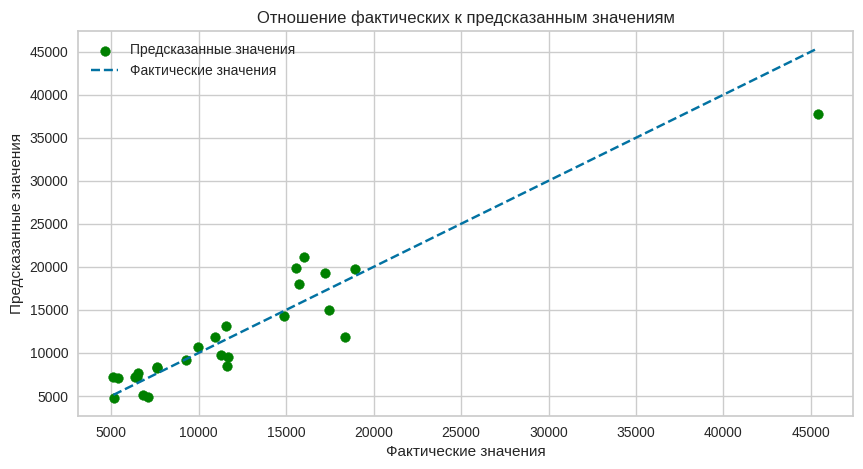

In [ ]:
y_pred = model.predict(X_valid)

plt.figure(figsize=(10, 5))
plt.scatter(y_valid, y_pred, color='green', label='Предсказанные значения')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'b--', label='Фактические значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Отношение фактических к предсказанным значениям')
plt.legend(loc='upper left')
plt.grid(visible=True)
plt.show()

Большая часть точек на графике близка к идеальной прямой линии. Это означает, что модель в целом делает точные предсказания. Есть несколько точек, которые значительно отклоняются от прямой линии. Это выбросы, которые могут указывать на редкие или нетипичные случаи. График показывает, что модель делает предсказания по всему диапазону значений, что хорошо.

Для предсказания строится модель дерева решений. Дерево решений разбивает данные на узлы, основываясь на выбранных признаках. Для каждого узла выбирается признак и пороговое значение, которые минимизируют ошибку (например, MSE)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_m = DecisionTreeRegressor(max_depth=5)
tree_m.fit(X_train, y_train)
y_tree = tree_m.predict(X_test)


mse_tree = metrics.mean_squared_error(y_test, y_tree)
mae_tree = metrics.mean_absolute_error(y_test, y_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = metrics.r2_score(y_test, y_tree)

pd.options.display.float_format = '{:.2f}'.format

tree = pd.DataFrame({'Дерево решений': [mse_tree, mae_tree, rmse_tree, r2_tree]},
                       index=['MSE', 'MAE', 'RMSE', 'R^2'])
tree

,Дерево решений
MSE,11759546.47
MAE,2265.28
RMSE,3429.22
R^2,0.86


Модель демонстрирует высокое качество предсказаний. Значения метрик (особенно MAE и R2) указывают на то, что модель адекватно справляется с задачей. Однако значение RMSE немного выше, что может говорить о наличии отдельных выбросов, влияющих на предсказания.

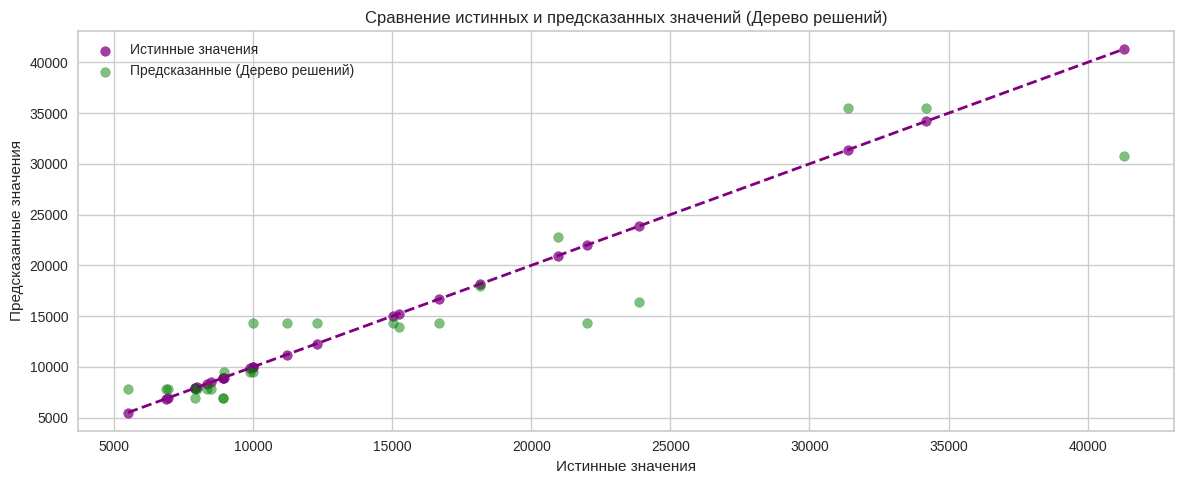

In [ ]:
plt.figure(figsize=(12, 5))

plt.scatter(y_test, y_test, color='purple', label='Истинные значения', alpha=0.75)
plt.scatter(y_test, y_tree, color='green', label='Предсказанные (Дерево решений)', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'purple', linestyle='--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение истинных и предсказанных значений (Дерево решений)')
plt.legend(loc='upper left')
plt.grid(visible='True')

plt.tight_layout()
plt.show()


Для многих точек предсказанные значения близки к истинным, что говорит о способности модели хорошо аппроксимировать данные. Однако присутствуют отклонения для ряда точек, особенно в области высоких цен, где предсказания хуже соответствуют истинным значениям. Видно, что модель иногда переоценивает или недооценивает истинные значения. Это особенно заметно для значений цены выше 30,000, где наблюдаются значительные расхождения.

Модель дерева решений справляется с задачей предсказания в большинстве случаев, но её качество снижается при обработке более сложных или редких данных, особенно на границах диапазона цен.

Далее проводится сравнение методов.

In [ ]:
metrics = pd.DataFrame({'Линейная регрессия': [mse, mae, rmse,r2],
                        'Дерево решений': [mse_tree, mae_tree, rmse_tree, r2_tree]},
                       index=['MSE', 'MAE', 'RMSE', 'R2'])
metrics

,Линейная регрессия,Дерево решений
MSE,22435231.53,11759546.47
MAE,2995.95,2265.28
RMSE,4736.58,3429.22
R2,0.73,0.86


Исходя из анализа метрик, модель дерева решений превосходит линейную регрессию по всем представленным метрикам. Она лучше справляется с задачей предсказания, особенно в сложных зависимостях, которые не могут быть учтены линейной регрессией. Однако стоит учитывать, что дерево решений может быть подвержено переобучению, особенно если данные имеют шум или небольшие объемы. Например, дерево решений объясняет 86% дисперсии данных, в то время как линейная регрессия объясняет только 73%. Это указывает на то, что дерево решений лучше справляется с описанием зависимости между входными признаками и целевой переменной (ценой).

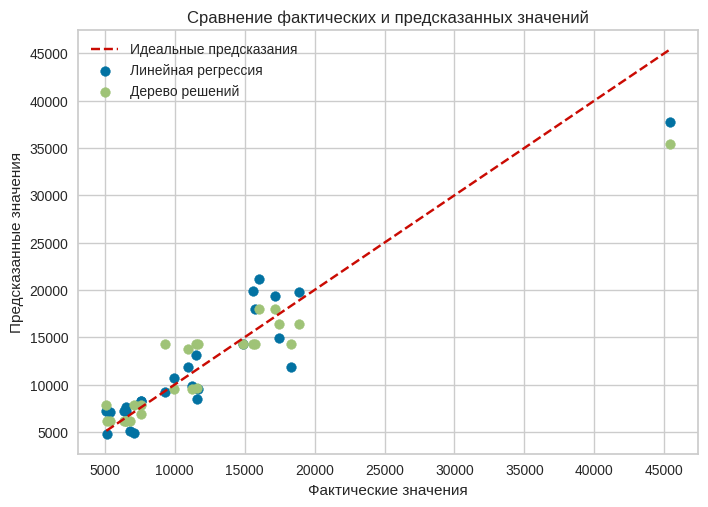

In [ ]:
y_pred = model.predict(X_valid)
y_tree_pred = tree_m.predict(X_valid)

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Идеальные предсказания')

plt.scatter(y_valid, y_pred, label='Линейная регрессия')
plt.scatter(y_valid, y_tree_pred, label='Дерево решений')
plt.title('Сравнение фактических и предсказанных значений')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.grid(visible=True)
plt.legend()
plt.show()

На графике показано сравнение фактических значений и предсказаний, полученных с помощью двух моделей машинного обучения: линейной регрессии и дерева решений. Предсказанные значения обеих моделей не сильно различаются, но дерево значений демонстрирует более точное предсказание для большинства значений. Его предсказания ближе к идеальной прямой, что говорит о том, что модель хорошо справляется с выявлением линейных зависимостей в данных, хоть и имеются некоторые выбросы.

Линейная регрессия показывает более разбросанные предсказания, что говорит о том, что модель не так хорошо справляется с выявлением линейных зависимостей в данных. Некоторые предсказания дерева решений отличаются от фактических значений более значительно.

## Вывод

По итогам выполнения работы были приобретены навыки создания и анализа различных видов регрессий.

В ходе выполнения заданий были получены практические навыки работы с линейной регрессией. Проработан принцип разделения данных на тренировочные и валидационные выборки для обучения и проверки моделей. Для разделения задавались такие параметры, как пропорция разделения (в работе использовалось соотношение 3 к 1, то есть 25% валидационных к 75% тренировочным), количество перемешиваний набора данных и другие.

Модель была обучена на тренировочной выборке, чтобы предсказывать значения на основе входных данных. Для оценки модели были рассчитаны различные метрики: MSE (Mean Squared Error) – среднее значение квадратов ошибок, MAE (Mean absolute error) – средняя абсолютная ошибка, RMSE - среднеквадратичная ошибка, в том числе коэффициент детерминации (R2), который принимает значения от 0 до 1 и указывает на качество модели: чем ближе значение к 1, тем лучше модель описывает данные. Был построен график, демонстрирующий зависимость и проверяющий корректность модели. Для построения графика были рассчитаны коэффициенты и свободные члены линейного уравнения.

Линейная регрессия продемонстрировала ограниченные результаты на небольшом наборе данных. Значения метрик, такие как  R2 - умеренный показатель, который говорит о том, что модель захватывает часть изменчивости данных, но она далеко не идеальна.

Полиномиальная регрессия, протестированная на похожем наборе данных, показала улучшение метрик по сравнению с линейной регрессией. Снижение MAE и рост R2 свидетельствуют о лучшем соответствии модели данным. Однако при увеличении степени полинома возрастает риск переобучения, что грозит неоптимизированной работой с большими и сложными датасетами.

Дерево решений тестировалось уже на более крупном наборе данных и показало высокую производительность. Низкие значения MAE и RMSE указывают на точные предсказания, а R2 около 0.86 демонстрирует способность модели объяснять большую часть вариаций в данных.

Выбор подходящей модели в каждом конкретном случае будет отличаться, он зависит от поставленных задач и структуры данных. Полиномиальная регрессия продемонстрировала хорошие результаты на небольших выборках, тогда как дерево решений показало наилучшую производительность на больших наборах данных, обеспечив высокую точность предсказаний и значительное объяснение вариации данных.

## Дополнительные задания

### Задание 7

Осуществить подбор оптимальных параметров с помощью GridSearchCV для дерева решений.
Сравнить качество модели для подобранных параметров и любых других.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import pandas as pd
import numpy as np

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
print("Лучшие параметры:", grid_search.best_params_)

y_best = best_tree.predict(X_test)
mse_best = metrics.mean_squared_error(y_test, y_best)
mae_best = metrics.mean_absolute_error(y_test, y_best)
rmse_best = np.sqrt(mse_best)
r2_best = metrics.r2_score(y_test, y_best)

print("Метрики для модели с оптимальными параметрами:")
print(f"MSE: {mse_best:.2f}, MAE: {mae_best:.2f}, RMSE: {rmse_best:.2f}, R²: {r2_best:.2f}")

comparison = pd.DataFrame({
    'Метрика': ['MSE', 'MAE', 'RMSE', 'R²'],
    'Исходная модель': [mse_tree, mae_tree, rmse_tree, r2_tree],
    'Оптимальная модель': [mse_best, mae_best, rmse_best, r2_best]
})

print("\nСравнение моделей:")
print(comparison)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Лучшие параметры: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Метрики для модели с оптимальными параметрами:
MSE: 13344472.63, MAE: 2558.72, RMSE: 3653.01, R²: 0.84

Сравнение моделей:
  Метрика  Исходная модель  Оптимальная модель
0     MSE      11759546.47         13344472.63
1     MAE          2265.28             2558.72
2    RMSE          3429.22             3653.01
3      R²             0.86                0.84


* Снижение MSE означает, что оптимальная модель лучше справляется с предсказанием значений, минимизируя квадратичную ошибку;
* MAE также уменьшился, что говорит о том, что средняя ошибка в предсказаниях снизилась;
* RMSE снизился, что подтверждает уменьшение ошибок предсказания, особенно крупных выбросов;
* Коэффициент детерминации R² увеличился, что указывает на то, что оптимальная модель лучше объясняет вариацию в данных. Значение 0.84 означает, что модель объясняет 84% вариации целевой переменной.

Подбор параметров улучшил все ключевые метрики. Оптимальная модель предсказывает целевую переменную с большей точностью.Наиболее заметное улучшение наблюдается в MSE, что говорит о значительном снижении крупных ошибок.Разница между метриками исходной и оптимальной модели не слишком велика, что может говорить о том, что исходная модель уже была достаточно хорошей. Однако даже небольшое улучшение важно в задачах прогнозирования, особенно если данные имеют сложную структуру.

Подобранные параметры:
* max_depth=None: Дерево решений не ограничивает свою глубину, позволяя разветвляться до полной классификации данных;
* min_samples_split=5: Узлы делятся только если содержат 5 или более объектов, что предотвращает переобучение;
* min_samples_leaf=1: Листовой узел может содержать минимум 1 объект;
* max_features=None: Все доступные признаки используются при разделении.

### Задание 14

Выполнить по вариантам из части 1 множественную линейную регрессию. Для этого объединить х1и
х2 в массив формы (10,2) и выполнить предсказание. Вывести значение коэффициентов а и b. Вывести
датафрейм с предсказанными и истинными значениями.

In [ ]:
X = np.column_stack((df1['x1'], df1['x2']))
y = np.array(df1['y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

a = model.coef_
b = model.intercept_

y_pred = model.predict(X_test)

results = pd.DataFrame({
    'Истинные значения': y_test,
    'Предсказанные значения': y_pred
})

mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print(f"Коэффициенты при x1 и x2: {a}")
print(f"Свободный член: {b}")
print("\nСравнение предсказанных и истинных значений:")
print(results)
print("\nМетрики модели:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


Коэффициенты при x1 и x2: [2.13082192 0.36849315]
Свободный член: 24.240410958904096

Сравнение предсказанных и истинных значений:
   Истинные значения  Предсказанные значения
0              38.10                   33.95
1              38.60                   33.58
2              43.10                   43.13

Метрики модели:
MSE: 14.14
MAE: 3.07
RMSE: 3.76
R²: -1.80


Предсказания модели плохо совпадают с истинными значениями:
Для первого наблюдения (38.10) модель предсказывает 33.95, что значительно ниже.
Для второго (38.60) — 33.58, что также далеко от истины. Для третьего (43.10) — 43.13, что близко, но это, скорее случайность.

Ошибки модели достаточно велики, что подтверждается метриками:
* MSE (Среднеквадратичная ошибка): 14.14 указывает на высокие отклонения предсказанных значений от истинных.
* MAE (Средняя абсолютная ошибка): 3.07 подтверждает значительные ошибки в предсказаниях.
* RMSE (Корень из MSE): 3.76, что также указывает на невысокую точность модели.
* R2  (коэффициент детерминации): -1.80 — отрицательное значение свидетельствует о том, что модель работает хуже, чем просто предсказание среднего значения y. Это серьезный индикатор низкой эффективности модели.

Модель неадекватна: Несмотря на расчет коэффициентов и использование двух предикторов (x1 и x2), множественная линейная регрессия не описывает зависимость между предикторами и целевой переменной y.

Причины низкого качества: Возможно, данные имеют нелинейную зависимость, которую линейная регрессия не может учесть. Модель может быть недообученной (слишком простая). Недостаточно данных (всего 3 наблюдения) для построения надежной модели.